# 04. 데이터를 데이터베이스에 저장하고 분석하기

## MySQL 접속
- shell에서 `mysqlsh` 입력하여 접속하거나 MySQL 설치하면서 생긴 실행 파일 'MySQL Shell'을 실행하여 접속
- `\connect root@localhost:3306`을 입력하여 연결
- `\sql` 명령어를 입력하여 sql 명령어 모드로 변경

## 데이터베이스와 사용자 만들기
- 데이터베이스 이름 : scrapingdata
- 문자 코드 : utf8
```mysql
CREATE DATABASE scrapingdata DEFAULT CHARACTER SET utf8;
```

- 사용자 이름 : scrapingman
- 비밀번호 : myPassword-1
```mysql
CREATE USER 'scrapingman' IDENTIFIED BY 'myPassword-1';
```

- 사용자에게 이전에 만든 데이터를 읽고 쓸 수 있는 권한 부여
```mysql
GRANT ALL ON scrapingdata.* TO scrapingman;
```
- `CTRL+D`로 접속 종료

## 파이썬에서 MySQL에 접속하기

In [3]:
import MySQLdb

MySQLdb.version_info

(2, 0, 3, 'final', 0)

### 데이터베이스에 접속해서 SQL 실행하기
- 사용자 이름, 비밀번호, 호스트(localhost라면 생략 가능함), 데이터베이스 이름, 문자 코드(생략하면 디폴드 문자 코드)를 지정하여 데이터베이스에 접속

In [4]:
import MySQLdb

connection = MySQLdb.connect(
    user='scrapingman',
    passwd='myPassword-1',
    host='localhost',
    db='scrapingdata',
    charset='utf8'
)

In [5]:
type(connection)

MySQLdb.connections.Connection

In [6]:
cursor = connection.cursor()
type(cursor)

MySQLdb.cursors.Cursor

### 테이블 만들기
- commit 메서드를 호출해야 SQL 구문이 실행됨

In [7]:
cursor.execute('CREATE TABLE books (title text, url text)')
connection.commit()

### 테이블 확인하기
- MySQL 서버에 접속하여 테이블 출력
```mysql
SHOW TABLES FROM scrapingdata;
SHOW COLUMNS FROM books FROM scrapingdata;
```
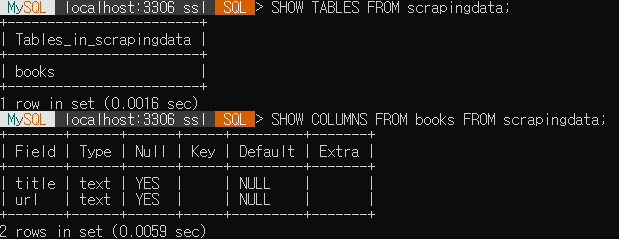

### 테이블에 레코드 추가하기
- Cursor 클래스의 execute 메서드를 사용
- 첫 번째 매개 변수에는 SQL 구문, 두 번째 매개 변수에는 파라미터를 지정

In [8]:
cursor.execute("INSERT INTO books VALUES(%s, %s)", ("처음 시작하는 파이썬 프로그래밍", "https://example.com"))

1

In [9]:
connection.commit()

### 테이블 확인하기

In [12]:
cursor.execute("SELECT * FROM scrapingdata.books;")

1

In [13]:
rows = cursor.fetchall()
print(rows)

(('처음 시작하는 파이썬 프로그래밍', 'https://example.com'),)


In [14]:
# 연결 종료
connection.close()

### 추가 코드
```python
# 이미 존재하는 테이블이라면 제거하고 새로 생성하기
cursor.execute("DROP TABLE IF EXISTS books")
cursor.execute("CREATE TABLE books (title text, url text)")
```